In [67]:
#Loading pandas to update data
import pandas as pd
from sklearn.linear_model import LinearRegression

In [68]:
data = pd.read_csv("Capstone_data_NCAA_Academic_Progress_data_clean.csv")

In [69]:
#Cleaning up the data so machine learning will work:

#Add a column with a numerical code for NCAA conference
data['NCAACONF_ID'] = data['NCAA_CONFERENCE'].astype('category').cat.codes

In [70]:
#Multiply all the Retention and Eligibility columns by 1000 so they are numerically the same as APR

columns_to_multiply = ['FOURYEAR_ELIGIBILITY', 'FOURYEAR_RETENTION','2014_ELIGIBILITY', '2014_RETENTION', 
'2013_ELIGIBILITY', '2013_RETENTION', 
'2012_ELIGIBILITY', '2012_RETENTION',
'2011_ELIGIBILITY', '2011_RETENTION',
'2010_ELIGIBILITY', '2010_RETENTION',
'2009_ELIGIBILITY', '2009_RETENTION',
'2008_ELIGIBILITY', '2008_RETENTION',
'2007_ELIGIBILITY', '2007_RETENTION',
'2006_ELIGIBILITY', '2006_RETENTION',
'2005_ELIGIBILITY', '2005_RETENTION',
'2004_ELIGIBILITY', '2004_RETENTION']

data[columns_to_multiply] = data[columns_to_multiply]*1000

In [71]:
print(data.loc[:,['FOURYEAR_ELIGIBILITY', 'FOURYEAR_RETENTION', 
'2014_ELIGIBILITY', '2014_RETENTION', 
'2013_ELIGIBILITY', '2013_RETENTION', 
'2012_ELIGIBILITY', '2012_RETENTION',
'2011_ELIGIBILITY', '2011_RETENTION',
'2010_ELIGIBILITY', '2010_RETENTION',
'2009_ELIGIBILITY', '2009_RETENTION',
'2008_ELIGIBILITY', '2008_RETENTION',
'2007_ELIGIBILITY', '2007_RETENTION',
'2006_ELIGIBILITY', '2006_RETENTION',
'2005_ELIGIBILITY', '2005_RETENTION',
'2004_ELIGIBILITY', '2004_RETENTION']])

      FOURYEAR_ELIGIBILITY  FOURYEAR_RETENTION  2014_ELIGIBILITY  \
0                    902.0               953.6             976.2   
1                    886.1               961.3             810.8   
2                    917.7               988.0             916.7   
3                    794.9               846.2             875.0   
4                    883.3               982.9             882.4   
...                    ...                 ...               ...   
5792                 982.4               986.7            1000.0   
5793                1000.0              1000.0            1000.0   
5794                 970.0               978.3            1000.0   
5795                 974.0               982.5            1000.0   
5796                1000.0              1000.0            1000.0   

      2014_RETENTION  2013_ELIGIBILITY  2013_RETENTION  2012_ELIGIBILITY  \
0              976.2             871.8           948.7             854.2   
1              979.7           

In [72]:
data.head()

,SCHOOL_ID,SCHOOL_NAME,SCHOOL_TYPE,ACADEMIC_YEAR,SPORT_CODE,SPORT_NAME,NCAA_DIVISION,NCAA_CONFERENCE,FOURYEAR_ATHLETES,FOURYEAR_SCORE,...,2006_RETENTION,2005_ATHLETES,2005_SCORE,2005_ELIGIBILITY,2005_RETENTION,2004_ATHLETES,2004_SCORE,2004_ELIGIBILITY,2004_RETENTION,NCAACONF_ID
0,100654,Alabama A&M University,0,2014,1,Baseball,1,Southwestern Athletic Conference,80,931,...,948.7,21,917,881.0,952.4,20,975,975.0,975.0,27
1,100654,Alabama A&M University,0,2014,4,Football,1,Southwestern Athletic Conference,321,932,...,963.0,74,921,875.9,965.5,74,871,860.1,881.1,27
2,100654,Alabama A&M University,0,2014,2,Men's Basketball,1,Southwestern Athletic Conference,43,964,...,846.2,11,909,909.1,909.1,10,950,950.0,950.0,27
3,100654,Alabama A&M University,0,2014,6,Men's Golf,1,Southwestern Athletic Conference,22,898,...,888.9,7,929,857.1,1000.0,5,896,857.4,909.4,27
4,100654,Alabama A&M University,0,2014,14,"Men's Track, Indoor",1,Southwestern Athletic Conference,62,932,...,916.7,14,926,851.9,1000.0,12,938,916.7,958.3,27


# Chosen Machine Learning Model
## Linear Regression Model

Coefficients: [ 4.29780525e-01  4.36326579e-01 -4.47618170e-06 -4.33847406e-01
  9.66168074e-03]
Intercept: 134.97224135940564
Mean Squared Error (MSE): 38.373105858449506
Root Mean Squared Error (RMSE): 6.194602962131593
R-squared (R2): 0.9051215661331359


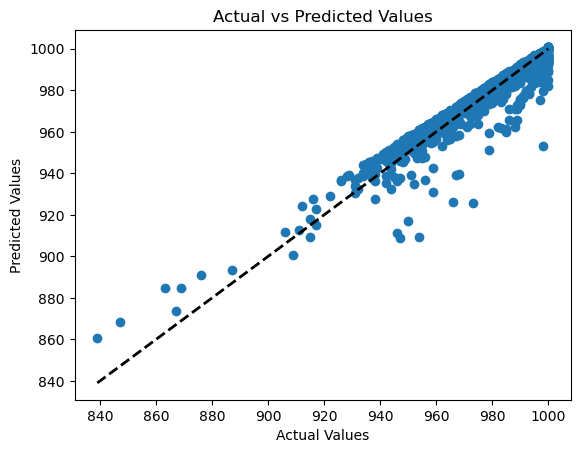

In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Split into features (X) and target (y)
X = data[['FOURYEAR_ELIGIBILITY', 'FOURYEAR_RETENTION', 'SCHOOL_ID', 'SCHOOL_TYPE', 'NCAACONF_ID']]  # Replace with your feature columns
y = data['FOURYEAR_SCORE']  # Replace with your target column

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

# Visualize predictions vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.show()

Coefficients: [ 4.29780525e-01  4.36326579e-01 -4.47618170e-06 -4.33847406e-01
  9.66168074e-03]
Intercept: 134.97224135940564
R-squared for train: 0.9097959600846576
R-squared for test: 0.9051215661331359
RMSE train: 5.698128916727835
RMSE test: 6.194602962131593
MSE train: 32.46867315164993
MSE test: 38.373105858449506

#### From the model test above, we see that the independent variables Eligibility, Retention, and School Type have the most affect on the dependent variable, APR. 

# Case Study Conclusion

In [74]:
# Using Machine Learning, we can predict what the APR will be in years to come based on the eligibility and retention. Let's go through some examples and see what we get.

In [75]:
# Create a new data point as a DataFrame for Iowa State University Softball Program
# Iowa State Average Eligibility = 992
# Iowa State Average Retention = 965
# Iowa State School ID = 153603
# Iowa State School Type = 0
# Iowa State Conf ID = 5
new_data = pd.DataFrame({'FOURYEAR_ELIGIBILITY': [992], 
                         'FOURYEAR_RETENTION': [965], 
                         'SCHOOL_ID': [153603],
                         'SCHOOL_TYPE': [0], 
                         'NCAACONF_ID': [24]})
# Make predictions on the new data
new_predictions = model.predict(new_data)

print("Predictions for new data:", new_predictions)

Predictions for new data: [981.9139961]


In [76]:
# Create a new data point as a DataFrame for University of Northern Iowa Softball Program
# University of Northern Iowa Average Eligibility = 989
# University of Northern Iowa Retention = 966
# University of Northern Iowa School ID = 154095
# University of Northern Iowa School Type = 0
# University of Northern Iowa Conf ID = 18
new_data = pd.DataFrame({'FOURYEAR_ELIGIBILITY': [989], 'FOURYEAR_RETENTION': [966], 'SCHOOL_ID': [154095],
                         'SCHOOL_TYPE': [0], 'NCAACONF_ID': [18]})
# Make predictions on the new data
new_predictions = model.predict(new_data)

print("Predictions for new data:", new_predictions)

Predictions for new data: [981.00080873]


In [77]:
# Create a new data point as a DataFrame for University of Missouri, Columbia Softball Program
# University of Missouri, Columbia Average Eligibility = 996
# University of Missouri, Columbia Average Retention = 975
# University of Missouri, Columbia School ID = 178396
# University of Missouri, Columbia School Type = 0
# University of Missouri, Columbia Conf ID = 24
new_data = pd.DataFrame({'FOURYEAR_ELIGIBILITY': [996], 'FOURYEAR_RETENTION': [975], 'SCHOOL_ID': [178396],
                         'SCHOOL_TYPE': [0], 'NCAACONF_ID': [24]})
# Make predictions on the new data
new_predictions = model.predict(new_data)

print("Predictions for new data:", new_predictions)

Predictions for new data: [987.88540601]


In [78]:
# Create a new data point as a DataFrame for University of Nebraska, Lincoln Softball Program
# University of Nebraska, Lincoln  Average Eligibility = 986
# University of Nebraska, Lincoln  Average Retention = 986
# University of Nebraska, Lincoln  School ID = 181464
# University of Nebraska, Lincoln School Type = 0
# University of Nebraska, Lincoln  Conf ID = 9
new_data = pd.DataFrame({'FOURYEAR_ELIGIBILITY': [986], 'FOURYEAR_RETENTION': [986], 'SCHOOL_ID': [181464],
                         'SCHOOL_TYPE': [0], 'NCAACONF_ID': [9]})
# Make predictions on the new data
new_predictions = model.predict(new_data)

print("Predictions for new data:", new_predictions)

Predictions for new data: [988.228535]


In [79]:
# Create a new data point as a DataFrame for Oklahoma State University Softball Program
# Oklahoma State University Average Eligibility = 973
# Oklahoma State UniversityAverage Retention = 973
# Oklahoma State University School ID = 207388
# Oklahoma State University School Type = 0
# Oklahoma State University Conf ID = 5
new_data = pd.DataFrame({'FOURYEAR_ELIGIBILITY': [973], 'FOURYEAR_RETENTION': [973], 'SCHOOL_ID': [207388],
                         'SCHOOL_TYPE': [0], 'NCAACONF_ID': [5]})
# Make predictions on the new data
new_predictions = model.predict(new_data)

print("Predictions for new data:", new_predictions)

Predictions for new data: [976.81445539]


In [80]:
# Create a new data point as a DataFrame for Texas A&M Softball Program
# Texas A&M Average Eligibility = 981
# Texas A&M Average Retention = 971
# Texas A&M School ID = 228723
# Texas A&M School Type = 0
# Texas A&M Conf ID = 24
new_data = pd.DataFrame({'FOURYEAR_ELIGIBILITY': [981], 'FOURYEAR_RETENTION': [971], 'SCHOOL_ID': [228723],
                         'SCHOOL_TYPE': [0], 'NCAACONF_ID': [24]})
# Make predictions on the new data
new_predictions = model.predict(new_data)

print("Predictions for new data:", new_predictions)

Predictions for new data: [979.46811903]


In [81]:
#Putting this predictive data into a table to review

pred_data = {'School': ['ISU', 'UNI', 'MO', 'NEB', 'OSU', 'TA&M',], 'Predicted APR': [982, 981, 988, 988, 976, 979]}
df = pd.DataFrame(pred_data)

df.style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#f2f2f2')]},
    {'selector': 'td', 'props': [('border', '1px solid black')]}
])

,School,Predicted APR
0,ISU,982
1,UNI,981
2,MO,988
3,NEB,988
4,OSU,976
5,TA&M,979


This predictive analysis shows that based on the past retention, eligibility and the type of school, any of these schools' softball programs would likely succeed academically. It does not look like any of these will be in danger of academic penalties. The variation in retention would be another factor I would look into as an athlete. If there is a lot of variation, it could be that athletes do not like the coaching staff, or there may be a change in coaching staff. 

# Other Models Plotted; Not Chosen for Predictive Analysis

## Scatterplot

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

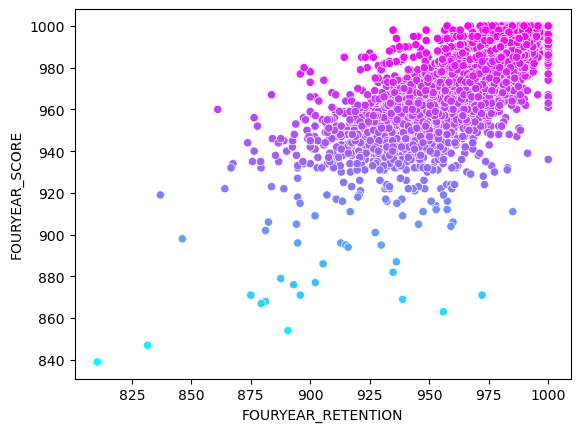

Root Mean Squared Error: 11.367394497169395
R-squared: 0.6496823563579966


In [48]:
#Define variables
x = data['FOURYEAR_RETENTION']
y = data['FOURYEAR_SCORE']

# Create a scatterplot
axes = sns.scatterplot(data=data, x=('FOURYEAR_RETENTION'), y='FOURYEAR_SCORE',
                      hue='FOURYEAR_SCORE', palette='cool', legend=False)

# Calculate RMSE and R-squared
y_pred = np.poly1d(np.polyfit(x, y, 1))(x)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

# Annotate the plot with RMSE and R-squared
#plt.text(0.5, 5.5, f'RMSE: {rmse:.2f}', fontsize=12)
#plt.text(0.5, 5, f'R-squared: {r2:.2f}', fontsize=12)
plt.show()

print("Root Mean Squared Error:", rmse) 
print("R-squared:", r2)

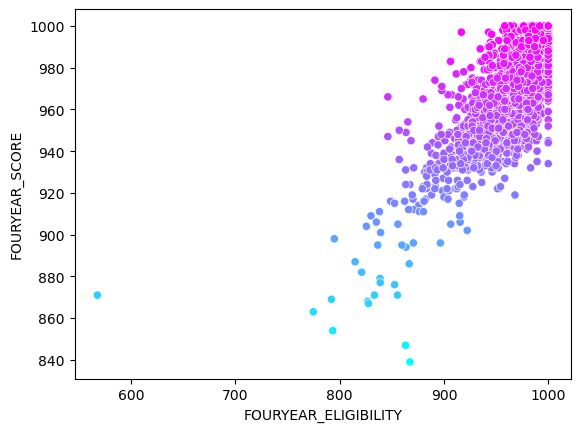

Root Mean Squared Error: 10.679375772261436
R-squared: 0.6908054123866278


In [49]:
# Create a scatterplot
x = data['FOURYEAR_ELIGIBILITY']
y = data['FOURYEAR_SCORE']

axes = sns.scatterplot(data=data, x=('FOURYEAR_ELIGIBILITY'), y='FOURYEAR_SCORE',
                      hue='FOURYEAR_SCORE', palette='cool', legend=False)

# Calculate RMSE and R-squared
y_pred = np.poly1d(np.polyfit(x, y, 1))(x)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

# Annotate the plot with RMSE and R-squared
#plt.text(0.5, 5.5, f'RMSE: {rmse:.2f}', fontsize=12)
#plt.text(0.5, 5, f'R-squared: {r2:.2f}', fontsize=12)
plt.show()

print("Root Mean Squared Error:", rmse) 
print("R-squared:", r2)

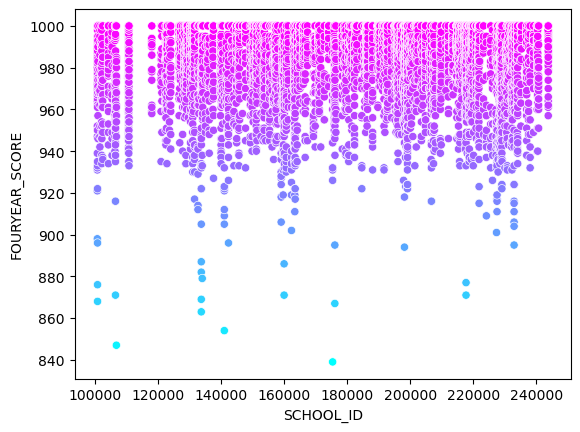

Root Mean Squared Error: 10.679375772261436
R-squared: 0.6908054123866278


In [50]:
# Create a scatterplot
axes = sns.scatterplot(data=data, x=('SCHOOL_ID'), y='FOURYEAR_SCORE',
                      hue='FOURYEAR_SCORE', palette='cool', legend=False)

# Calculate RMSE and R-squared
y_pred = np.poly1d(np.polyfit(x, y, 1))(x)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

# Annotate the plot with RMSE and R-squared
#plt.text(0.5, 5.5, f'RMSE: {rmse:.2f}', fontsize=12)
#plt.text(0.5, 5, f'R-squared: {r2:.2f}', fontsize=12)
plt.show()

print("Root Mean Squared Error:", rmse) 
print("R-squared:", r2)

#axes = sns.scatterplot(data=data, x=('SCHOOL_ID'), y='FOURYEAR_SCORE',
 #                     hue='FOURYEAR_SCORE', palette='flare', legend=False)

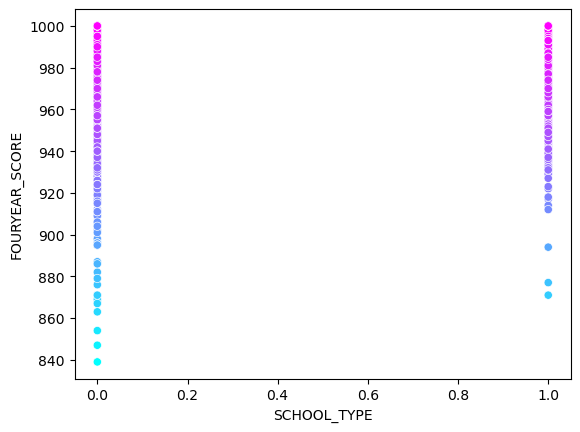

Root Mean Squared Error: 10.679375772261436
R-squared: 0.6908054123866278


In [51]:
# Create a scatterplot
axes = sns.scatterplot(data=data, x=('SCHOOL_TYPE'), y='FOURYEAR_SCORE',
                      hue='FOURYEAR_SCORE', palette='cool', legend=False)

# Calculate RMSE and R-squared
y_pred = np.poly1d(np.polyfit(x, y, 1))(x)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

# Annotate the plot with RMSE and R-squared
#plt.text(0.5, 5.5, f'RMSE: {rmse:.2f}', fontsize=12)
#plt.text(0.5, 5, f'R-squared: {r2:.2f}', fontsize=12)
plt.show()

print("Root Mean Squared Error:", rmse) 
print("R-squared:", r2)

#axes = sns.scatterplot(data=data, x=('SCHOOL_TYPE'), y='FOURYEAR_SCORE',
#                      hue='FOURYEAR_SCORE', palette='flare', legend=False)

## K Neighbors Regressor Model

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score 

# Load your dataset (assuming X is your feature matrix, y is your target variable)
# ... 

X = data[['FOURYEAR_ELIGIBILITY']]
y= data[['FOURYEAR_SCORE']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN regressor with a chosen k value (e.g., k=5)
knn_model = KNeighborsRegressor(n_neighbors=5)

# Train the model on the training data
knn_model.fit(X_train, y_train) 

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model's accuracy
mse = mean_squared_error(y_test, y_pred) 
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred) 

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse) 
print("R-squared:", r2)

Mean Squared Error: 136.0733103448276
Root Mean Squared Error: 11.665046521331478
R-squared: 0.6635554436427196


In [53]:
#k-nearest neighbors regression
#Setting variables
X = data[['FOURYEAR_ELIGIBILITY','FOURYEAR_RETENTION', 'SCHOOL_ID', 'SCHOOL_TYPE', 'NCAACONF_ID']].values
y = data[['FOURYEAR_SCORE']].values

#Visualize the data
#data.plot(kind='scatter', grid=True,
#         X='FOURYEAR_RETENTION', y='FOURYEAR_SCORE')
#plt.axis([500,1000,500,1000])
#plt.show()

# Split the data into training and testing sets (split training and testing data into 80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create the model
model = KNeighborsRegressor(n_neighbors=3)

#Train the model
model.fit(X_train,y_train)

#Make a prediction
X_new = [[970,980,100654, 0,27]] #Eligibility, Retention, School ID, School Type, NCAA Conference
print(model.predict(X_new)) 

[[981.66666667]]


## Random Forest Classifier, Gradient Boosting Classifier, SVC, KNeighbors Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Load the dataset
X = data[['SCHOOL_TYPE','FOURYEAR_ELIGIBILITY','FOURYEAR_RETENTION','SCHOOL_ID', 'NCAACONF_ID']]
y = data[['FOURYEAR_SCORE']]

#Split the data into training and testing models
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                   random_state=42)

In [57]:
#Define models
models = {
    'rfc': RandomForestClassifier(),
    'gbc': GradientBoostingClassifier(),
    'svc': SVC(),
    'knn': KNeighborsClassifier()
    
}

In [58]:
for name, model in models.items():
    model.fit(X_train, y_train.values.ravel()) #covert the array to (n,) (i.e. flatten it)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    print(f'{name} Accuracy/R2:{accuracy}')

rfc Accuracy/R2:0.3810344827586207
gbc Accuracy/R2:0.3775862068965517
svc Accuracy/R2:0.13706896551724138
knn Accuracy/R2:0.13275862068965516
